In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()

In [2]:
start='2006-01-01'
end='2016-01-01'

BAC = pdr.get_data_yahoo('BAC', start=start, end=end)

C = pdr.get_data_yahoo('BAC', start=start, end=end)

GS = pdr.get_data_yahoo('GS', start=start, end=end)

JPM = pdr.get_data_yahoo('JPM', start=start, end=end)

MS = pdr.get_data_yahoo('MS', start=start, end=end)

WFC = pdr.get_data_yahoo('WFC', start=start, end=end)

df = pdr.get_data_yahoo(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  6 of 6 completed


In [3]:
df['Close'].max()

Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [4]:
returns = pd.DataFrame()
returns = df['Close'].pct_change()
returns.head()

Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


<AxesSubplot:xlabel='Date'>

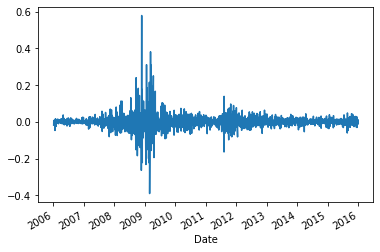

In [5]:
returns['C'].plot()

In [6]:
import seaborn as sns

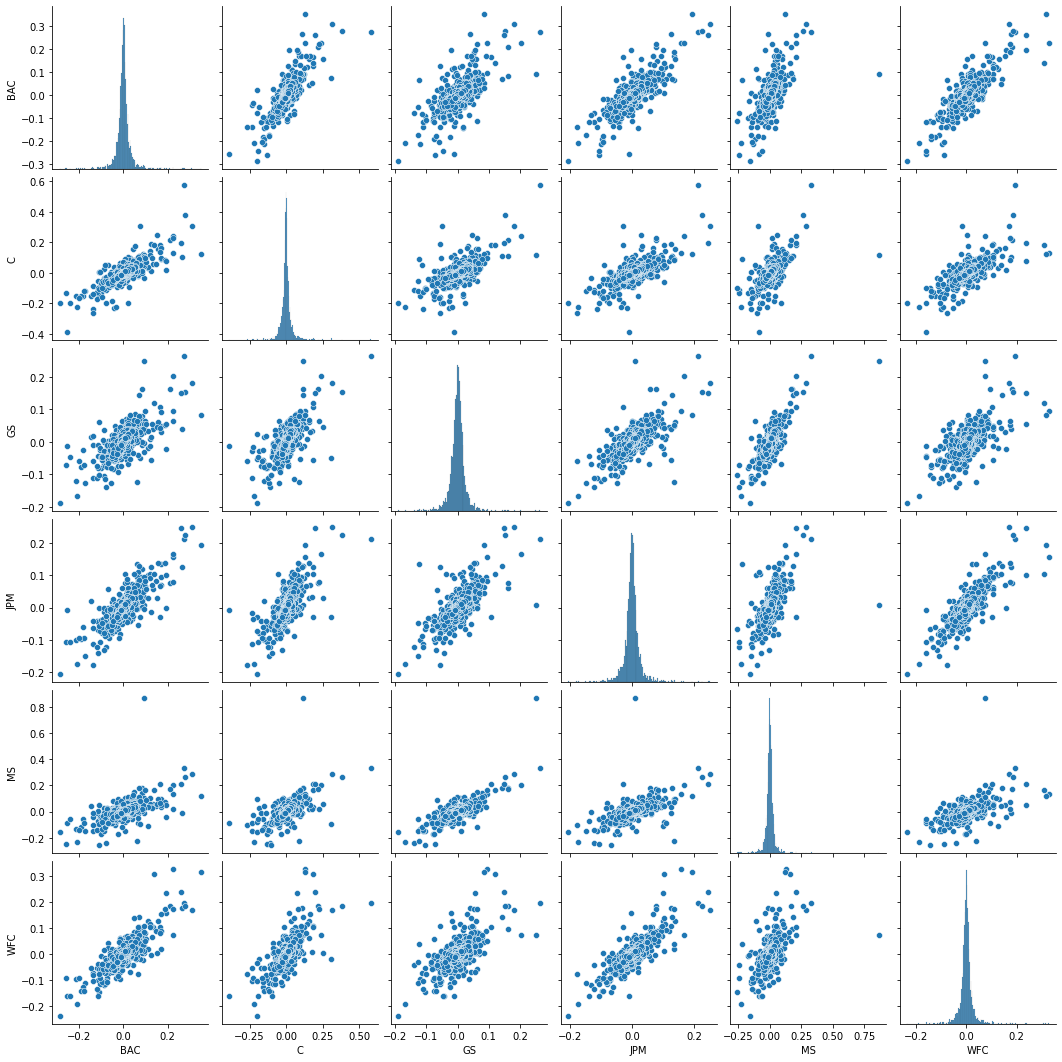

In [7]:
sns.pairplot(returns)

In [8]:
returns.idxmin()

Ticker
BAC   2009-01-20
C     2009-02-27
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

In [9]:
returns.idxmax()

Ticker
BAC   2009-04-09
C     2008-11-24
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

In [10]:
returns.std()

Ticker
BAC    0.036647
C      0.038672
GS     0.025390
JPM    0.027667
MS     0.037819
WFC    0.030238
dtype: float64

In [11]:
returns['2015-01-01':'2015-12-31'].std() 

Ticker
BAC    0.016163
C      0.015289
GS     0.014046
JPM    0.014017
MS     0.016249
WFC    0.012591
dtype: float64

<AxesSubplot:xlabel='MS', ylabel='Count'>

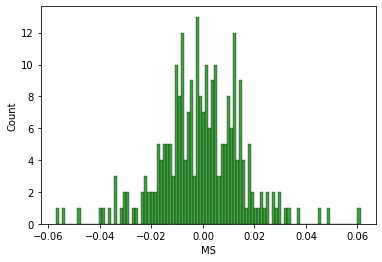

In [12]:
sns.histplot(returns['2015-01-01':'2015-12-31']['MS'],color='green',bins=100)

<AxesSubplot:xlabel='C', ylabel='Count'>

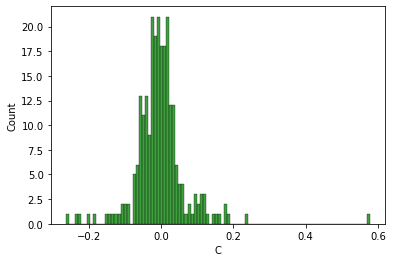

In [14]:
sns.histplot(returns['2008-01-01':'2008-12-31']['C'],color='green',bins=100)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

<AxesSubplot:xlabel='Date'>

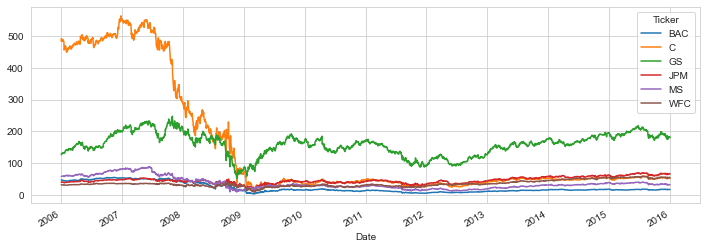

In [27]:
df['Close'].plot(figsize=(12,4))

In [34]:
BAC2008 = BAC['2008-01-01':'2008-12-31']['Close']

<AxesSubplot:xlabel='Date'>

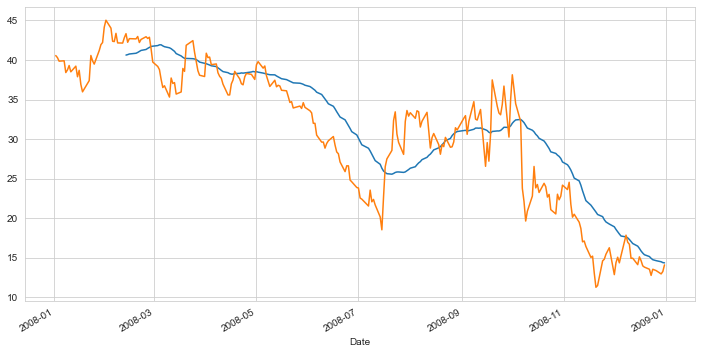

In [39]:
plt.figure(figsize=(12,6))
bac2008media=BAC2008.rolling(window=30).mean().plot()
BAC2008.plot()

<AxesSubplot:xlabel='Ticker', ylabel='Ticker'>

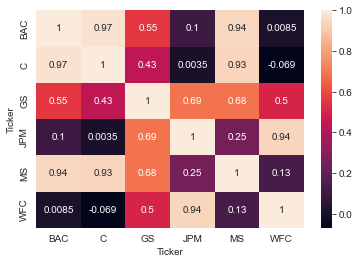

In [52]:
sns.heatmap(df['Close'].corr(),annot=True)

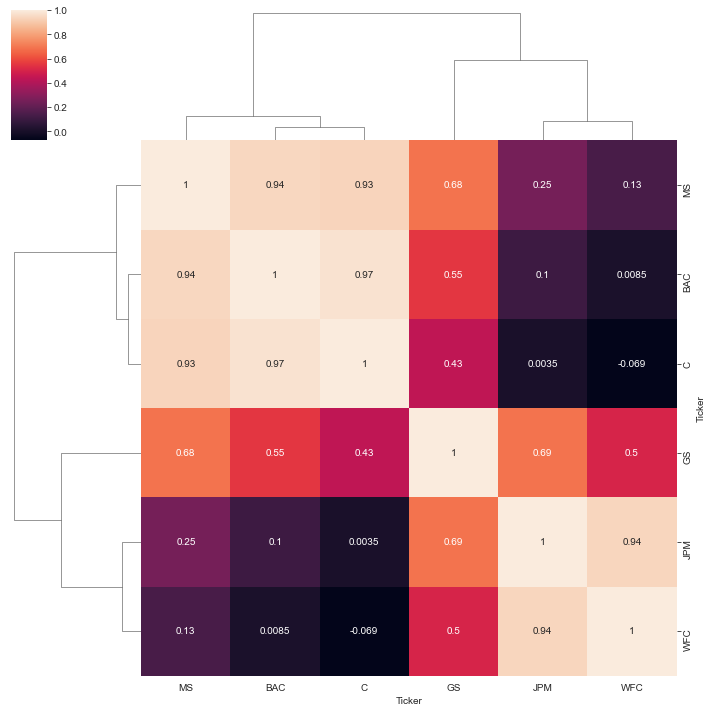

In [53]:
sns.clustermap(df['Close'].corr(),annot=True)